In [0]:
import cv2
from google.colab.patches import cv2_imshow #only in Colab because using cv2.imshow is not allowed in Colab
cv2.__version__

'4.1.2'

In [0]:
import os 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


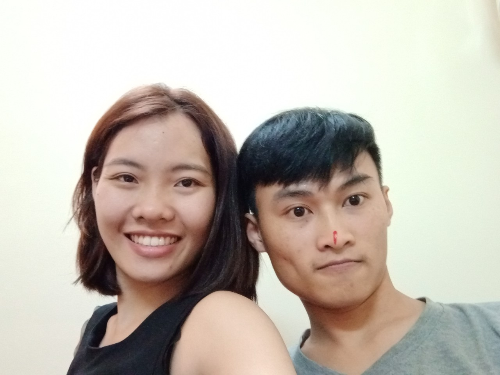

In [0]:
r = image.shape[0]/ image.shape[1]
x = 500
dim = (x, int(x*r))

image = cv2.resize(image, dim)
cv2_imshow(image)

In [0]:
# save image to current folder
cv2.imwrite('00c55bb853f9aba7f2e8.jpg', image)

True

### 4 - Threadholding

#### Blurring

Original


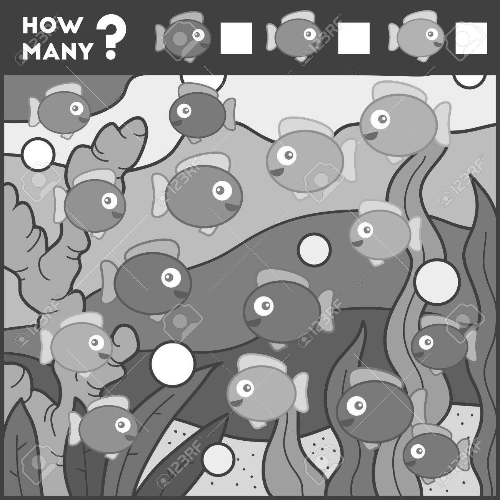

Avg


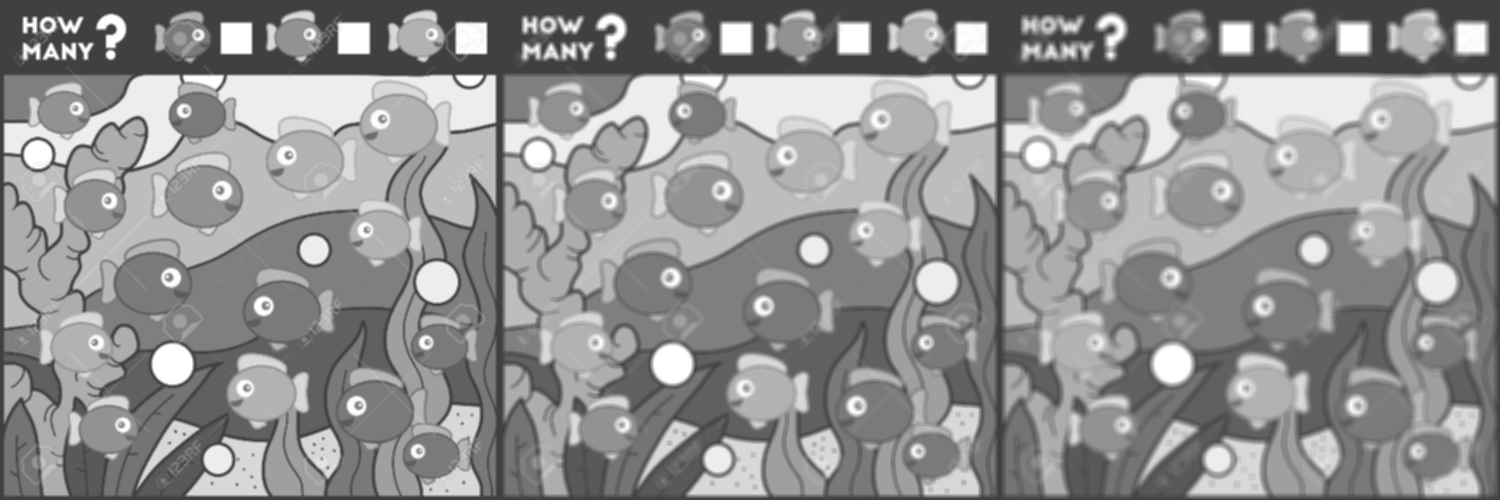

Gaussian


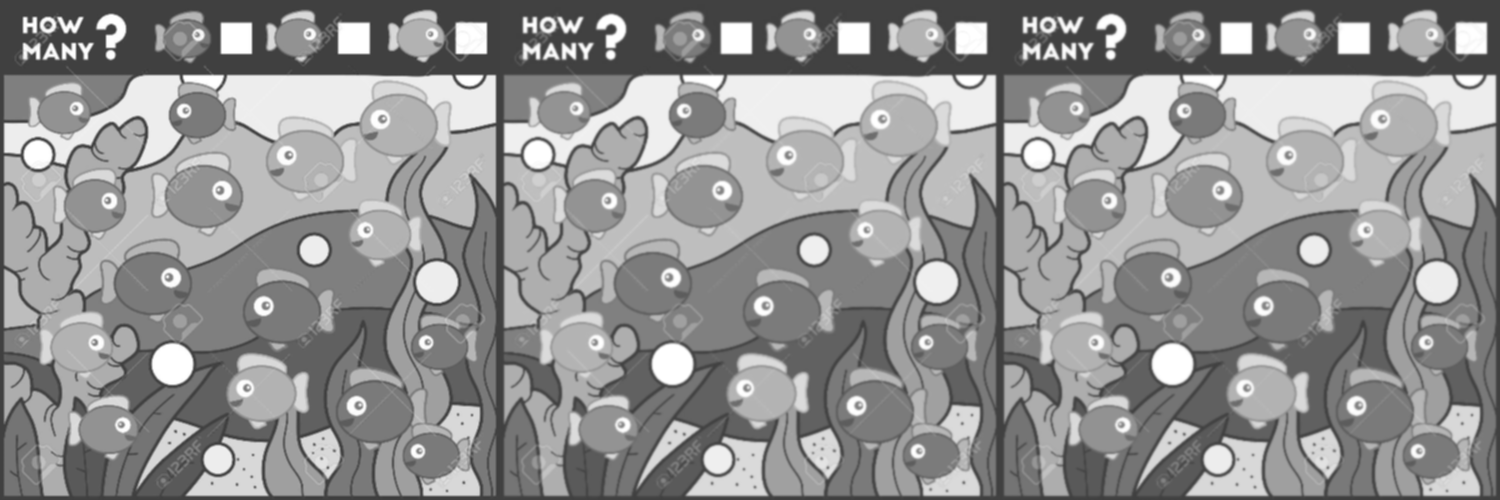

Bilateral


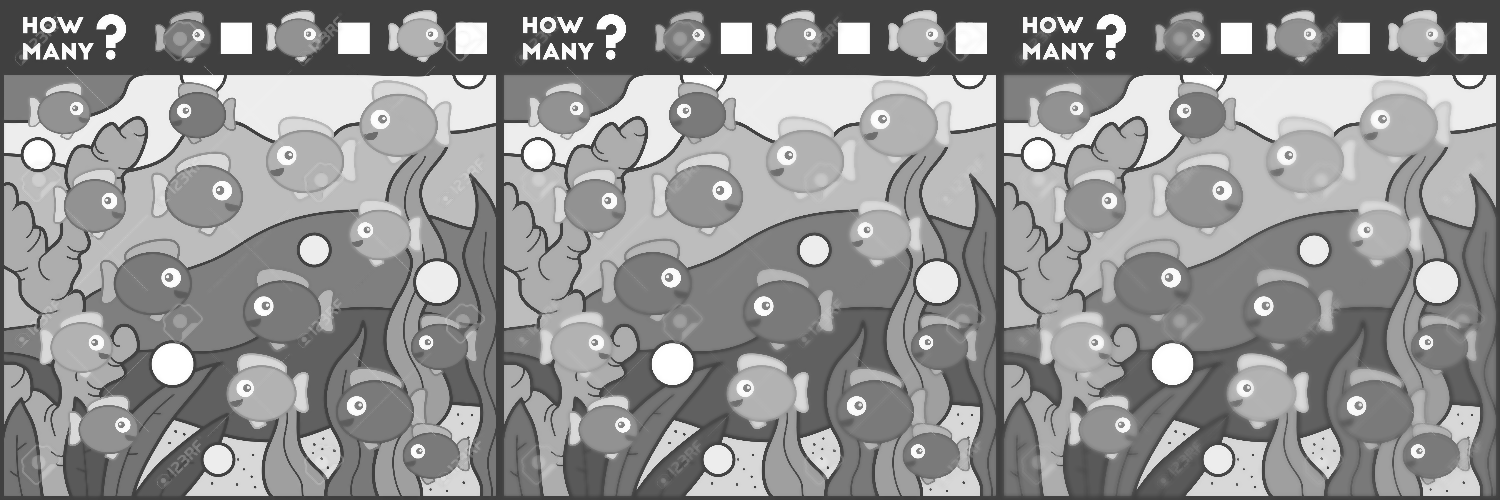

In [0]:
folder_path = "/content/drive/My Drive/CoderSchool-Mariana/Week_8/images"
file_name = "Ex2.jpg" 
absolute_path = os.path.join(folder_path, file_name)
image = cv2.imread(absolute_path)

#resize img
x = 500 
r = image.shape[1] // image.shape[0]
dim =(x, x*r)
image = cv2.resize(image, dim)

# save img
cv2.imwrite('Ex2.jpg', image)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original")
cv2_imshow(image)

# three popular blurring methods
blurred = np.hstack([
cv2.blur(image,(3,3)),
cv2.blur(image,(5,5)),
cv2.blur(image,(7,7))
])
print('Avg')
cv2_imshow(blurred)

blurred = np.hstack([
                    cv2.GaussianBlur(image, (3,3), 1),
                     cv2.GaussianBlur(image, (5,5), 1),
                     cv2.GaussianBlur(image, (7,7), 1)
])
print('Gaussian')
cv2_imshow(blurred)

blurred = np.hstack([
                     cv2.bilateralFilter(image, 5, 21, 21),
                     cv2.bilateralFilter(image, 7, 31, 31),
                     cv2.bilateralFilter(image, 9, 41,41)
])
print('Bilateral')
cv2_imshow(blurred)

#### Simple Thresholding

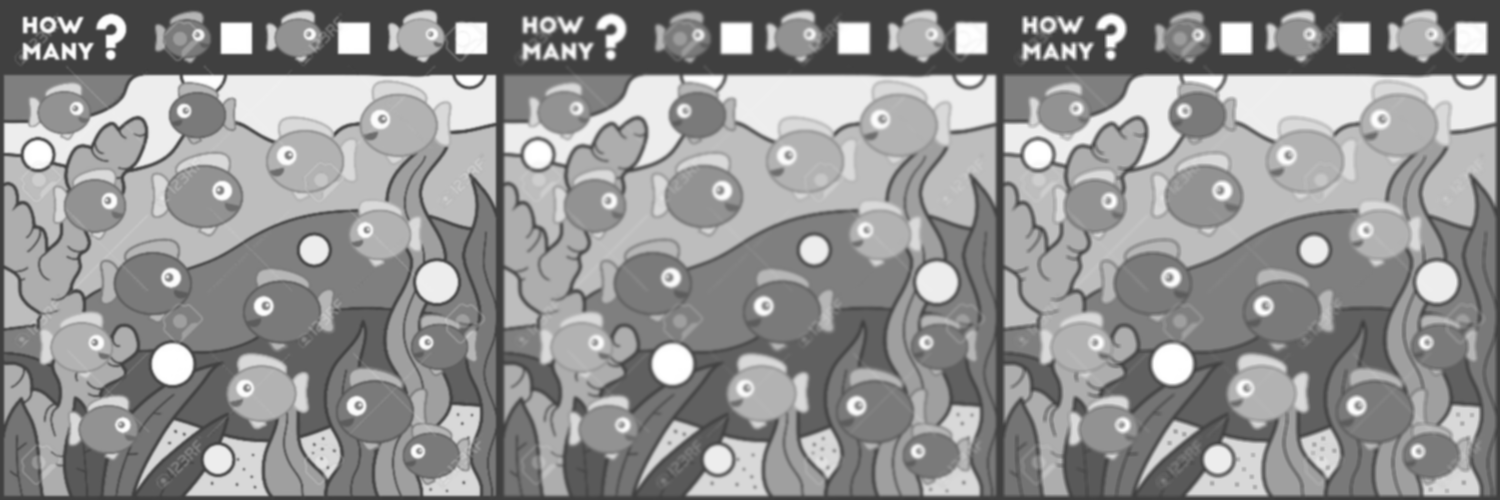

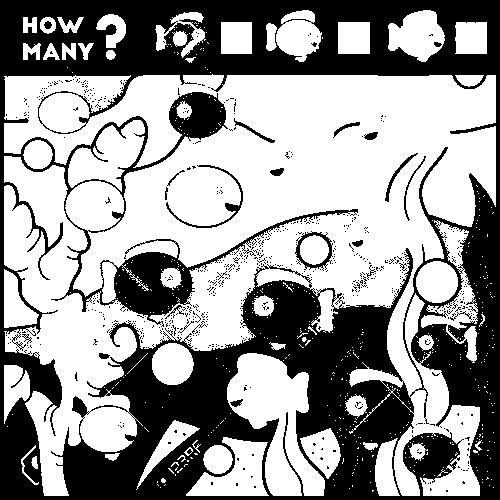

In [0]:
folder_path = "/content"
file_name = "Ex2.jpg" 
absolute_path = os.path.join(folder_path, file_name)
image = cv2.imread(absolute_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur to reduce noise
blur = cv2.GaussianBlur(image, (5,5), 0)

blur1 = np.hstack([
                  cv2.GaussianBlur(image, (5,5), 0),
                  cv2.GaussianBlur(image, (7,7), 0),
                  cv2.GaussianBlur(image, (5,5), 2)
])

cv2_imshow(blur1)

_, thresh = (cv2.threshold(image, 125, 255, cv2.THRESH_BINARY))
cv2_imshow(thresh)

Original


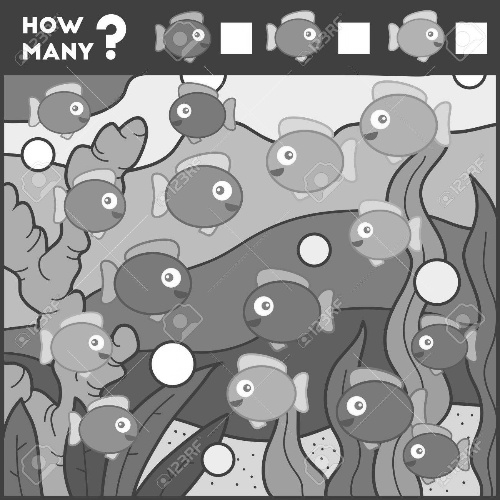

Mean Thresh


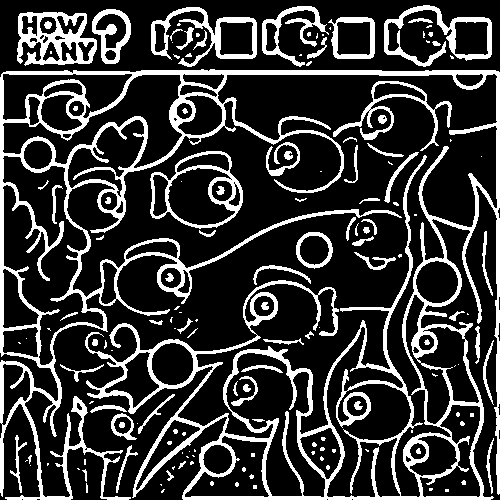

Gau


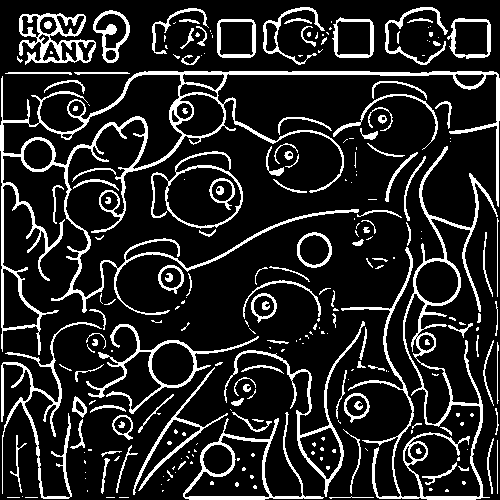

In [0]:
print("Original")
cv2_imshow(image)

# adaptiveThreshold mean
mean = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 8)
print("Mean Thresh")
cv2_imshow(mean)

# adaptiveThreshold gaussian
gau = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 8)
print('Gau')
cv2_imshow(gau)

Maybe even after above section, you are still not impressed with adaptive thresholding compared to normal threshold then this will change your mind. As you can see, select a fix threshold value = 127 does not do well for a real life photo with noises, while other adapative methods do it really well. It's just a matter of selecting the right algorithm and right parameters again.

![alt text](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/ada_threshold.jpg)

### 5 - Edge Dection

#### Laplacian Sobel

Original


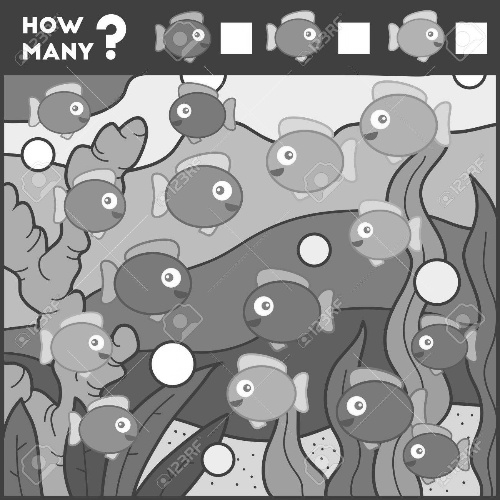

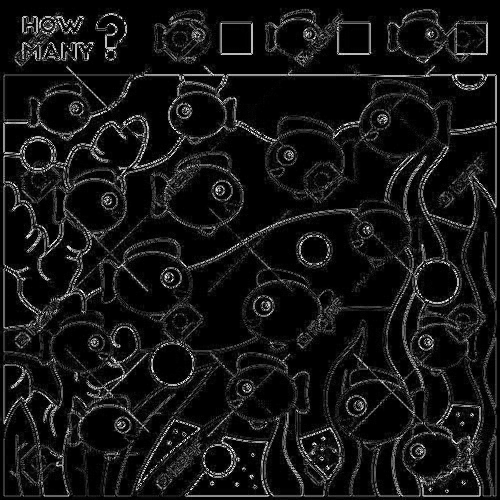

In [0]:
image = cv2.imread(absolute_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original")
cv2_imshow(image)

# Laplacian technique
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

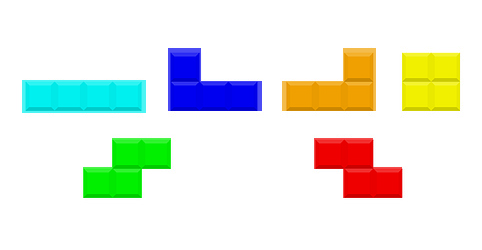

In [0]:
file_name = "tải xuống (4).png" 
absolute_path = os.path.join('/content/drive/My Drive', file_name)
image = cv2.imread(absolute_path)
cv2_imshow(image)

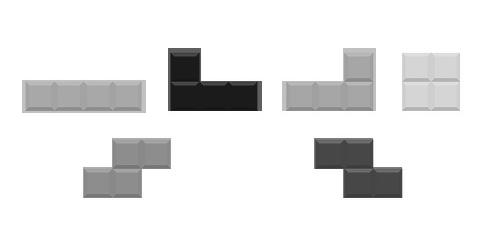

In [0]:
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

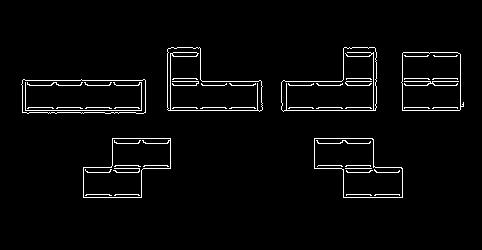

In [0]:
edged = cv2.Canny(image, 30, 150)
cv2_imshow(edged)

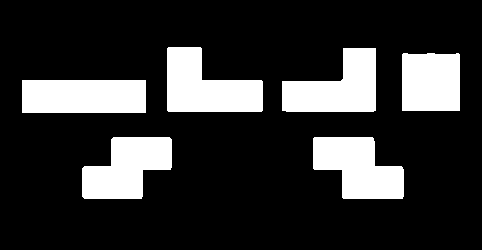

In [0]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh =cv2.threshold(blur, 230, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)


In [0]:
# !pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.6/dist-packages (0.5.3)


6


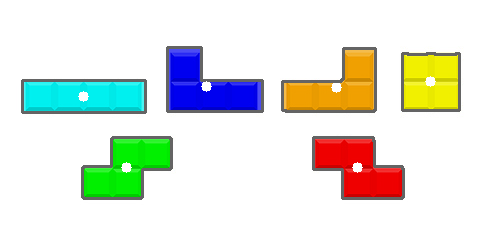

In [0]:
import imutils

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))
for c in cnts:
   # calculate moments for each contour
  M = cv2.moments(cnts[5])

  # calculate x,y coordinate of center
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])

  # draw contour
  cv2.drawContours(image, [c], -1, (100,100,100), 2)
  cv2.circle(image, (cX, cY), 5, (255, 255, 255), -1)

# display the image
cv2_imshow(image)


I found 1 objects!


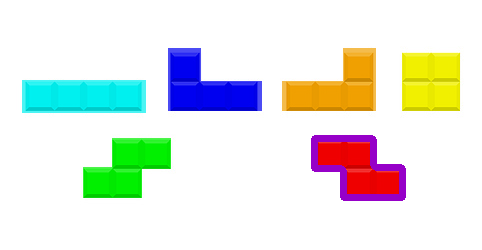

I found 2 objects!


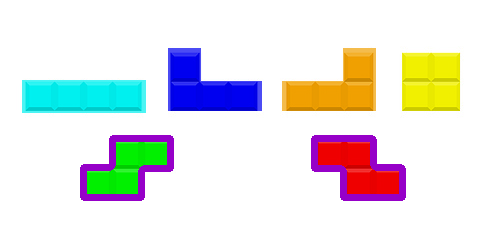

I found 3 objects!


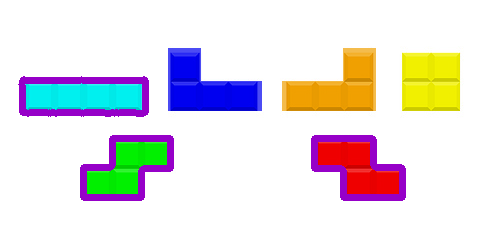

I found 4 objects!


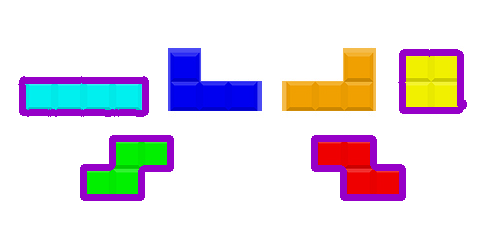

I found 5 objects!


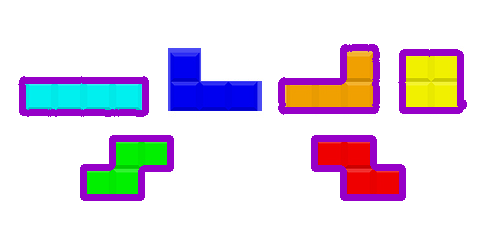

I found 6 objects!


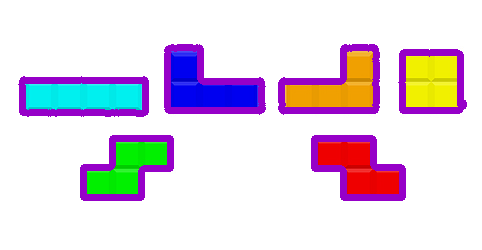

In [0]:
# find contours, remember to select first element of result
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# copy the image just to be safe
output = image.copy()

for i in range (len(cnts)+1):
	output = image.copy()
	if i == 0:
		cv2.drawContours(output, [cnts[i]], -1, (200,0,150), 5)
	else:
		cv2.drawContours(output, cnts[:i], -1, (200,0,150), 5)
		print(f'I found {i} objects!')
		cv2_imshow(output)


# cv2_imshow(a)

In [0]:
# draw the total number of contours found in purple
# hints: is there any cv2 function to put text in image ? and choose a good font please!


cv2_imshow( output)

## How many fish of each type?

![alt text](https://previews.123rf.com/images/ksenyasavva/ksenyasavva1611/ksenyasavva161100082/66627646-counting-game-for-preschool-children-educational-a-mathematical-game-count-how-many-items-and-write-.jpg)


## How many vegi of each type?

![alt text](https://previews.123rf.com/images/ksenyasavva/ksenyasavva1705/ksenyasavva170500004/77410420-counting-game-for-preschool-children-educational-a-mathematical-game-count-how-many-fruits-vegetable.jpg)

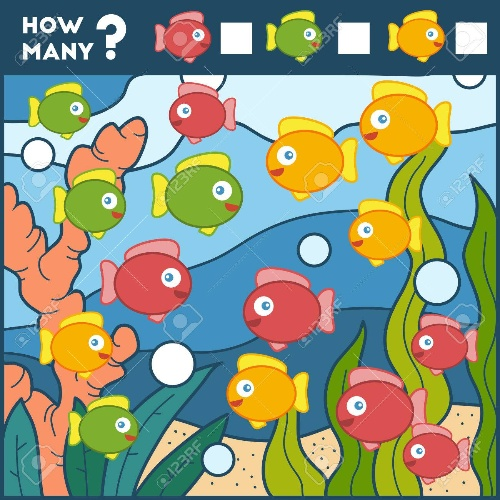

In [0]:
path = '/content'
filename = 'Ex2.jpg'
path = os.path.join(path, filename)
image = cv2.imread(path)
cv2_imshow(image)

5
#Green Fish 4


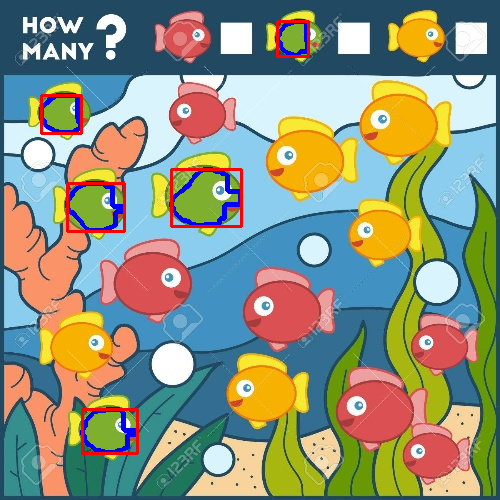

In [0]:
lowerBound = np.array([30, 175, 160])
upperBound = np.array([60, 200, 190])
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(imageHSV, lowerBound, upperBound)
# Filtering the mask
kernel_open=np.ones((5,5))
kernel_close=np.ones((20,20))
mask_open=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel_open)
mask_close=cv2.morphologyEx(mask_open,cv2.MORPH_CLOSE,kernel_close)

conts, h = cv2.findContours(mask_close.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(conts))
cv2.drawContours(image, conts, -1, (255, 0, 0), 3)

count = -1 # we don't count the fish in the question
for i in range(len(conts)):
    x, y, w, h = cv2.boundingRect(conts[i])
    if w * h > 500:
        count += 1
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)
print(f'#Green Fish {count}')

cv2_imshow(image)

#Yellow Fish 5


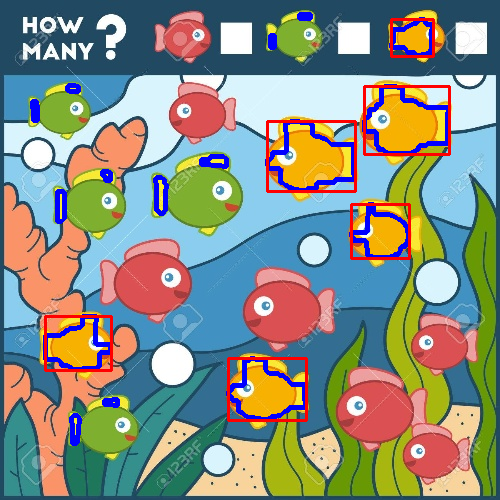

In [0]:
lowerBound = np.array([5, 175, 200])
upperBound = np.array([30, 255, 252])
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(imageHSV, lowerBound, upperBound)
# Filtering the mask
kernel_open=np.ones((5,5))
kernel_close=np.ones((20,20))
mask_open=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel_open)
mask_close=cv2.morphologyEx(mask_open,cv2.MORPH_CLOSE,kernel_close)

conts, h = cv2.findContours(mask_close.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, conts, -1, (255, 0, 0), 3)

count = -1 # we don't count the fish in the question
for i in range(len(conts)):
    x, y, w, h = cv2.boundingRect(conts[i])
    if w * h > 500:
        count += 1
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)
print(f'#Yellow Fish {count}')

cv2_imshow(image)

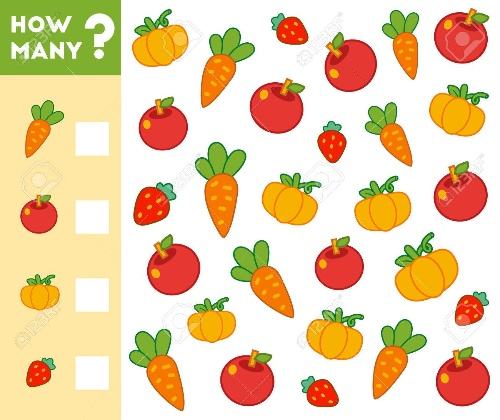

In [0]:
path = '/content' 
filename = 'Ex1.jpg'
path = os.path.join(path, filename)
image = cv2.imread(path)
cv2_imshow(image)

In [0]:
def hsv_mask(img, color, margin):
  upper = color + margin
  lower = color - margin 
  imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(imageHSV, lower, upper)
  return mask 

def kernel(mask, open, close):
  kernel_open = np.ones((open,open))
  kernel_close = np.ones((close,close))
  mask_open=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel_open)
  mask_close=cv2.morphologyEx(mask_open,cv2.MORPH_CLOSE,kernel_close)
  return mask_open, mask_close

def draw(image, mask_close):
  conts, h = cv2.findContours(mask_close.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cv2.drawContours(image, conts, -1, (255, 0, 0), 3)

  count = -1 # we don't count the fish in the question
  for i in range(len(conts)):
    x, y, w, h = cv2.boundingRect(conts[i])
    if w * h > 300:
        count += 1
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)
  print(f'#Tomato {count}')
  cv2_imshow(image)



#Tomato 7


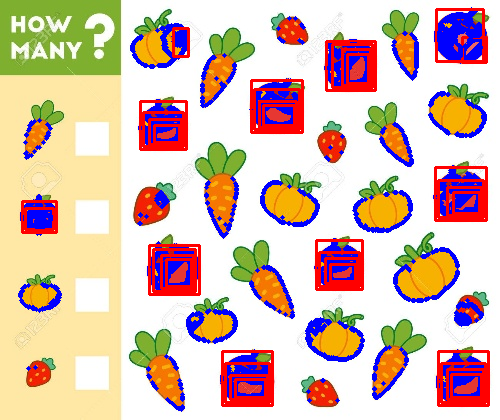

In [0]:
tomato = np.array([1,0.77*255,0.88*255], dtype='int32')
mask = hsv_mask(image, tomato, 30)
mask_open, mask_close = kernel(mask, 5, 20)
draw(image, mask_close)